# Pandas Cheat Sheet

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Object Creation

See the [Data Structure Intro](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro) section.

Creating a `Series by passing a list of values, letting pandas create a default integer index:


In [105]:
# create a Series with the supplied values
pd.Series([1, 3, 5, np.nan, 6, 8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a `DataFrame` by passing a NumPy array, with a datetime index and labeled columns:



In [106]:
# create a DatetimeIndex with the given range of dates as row label indexes
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [107]:
# supply random numbers with the NumPy random normal distribution function, index set to the DatetimeIndex from above, and columns A-D
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,1.614908,-0.417070,-0.464239,-0.141099
2013-01-02,1.928151,0.762022,2.204658,1.073671
2013-01-03,-0.431913,-2.505308,-2.038591,1.740540
2013-01-04,-0.598335,-1.962574,-0.291399,-1.153775
2013-01-05,-0.209602,0.037394,-1.090891,0.639756
2013-01-06,0.685055,0.010440,-0.765548,0.419550


Creating a `DataFrame` by passing a dict of objects that can be converted to series-like.



In [108]:
# create a DataFrame from a dictionary
#   column A is populated with all 1's
#   column B is populatated with the Timestamp 20130102
#   column C is populated with a Series of 1's, indexed to the range 0-4, and the dtype is specified as float32
#   column D is poplulated with a NumPy array of 4 length with 3's as an int32
#   column E is populated with a Categorical list of strings
#   column F is populated with the string "foo" for all rows
df2 = pd.DataFrame(
        {
          "A": 1.0,
          "B": pd.Timestamp("20130102"),
          "C": pd.Series(1, index=list(range(4)), dtype="float32"),
          "D": np.array([3] * 4, dtype="int32"),
          "E": pd.Categorical(["test", "train", "test", "train"]),
          "F": "foo",
        }
      )
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting `DataFrame` have different dtypes.

In [109]:
# display the datatypes of the columns for the DataFrame
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

See the [Basics](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics) section.

Here is how to view the top and bottom rows of the frame:

In [110]:
# display the top rows of the DataFrame for insepection
df.head()

,A,B,C,D
2013-01-01,1.614908,-0.417070,-0.464239,-0.141099
2013-01-02,1.928151,0.762022,2.204658,1.073671
2013-01-03,-0.431913,-2.505308,-2.038591,1.740540
2013-01-04,-0.598335,-1.962574,-0.291399,-1.153775
2013-01-05,-0.209602,0.037394,-1.090891,0.639756


In [111]:
# display the bottom rows of the DataFrame for inspection
df.tail(3)

,A,B,C,D
2013-01-04,-0.598335,-1.962574,-0.291399,-1.153775
2013-01-05,-0.209602,0.037394,-1.090891,0.639756
2013-01-06,0.685055,0.010440,-0.765548,0.419550


Display the index, columns:

In [112]:
# get the label indexes of the columns
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [113]:
# get the Index object for the columns
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`DataFrame.to_numpy()` gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your `DataFrame` has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column.** When you call `DataFrame.to_numpy()`, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

For `df`, our `DataFrame` of all floating-point values, `DataFrame.to_numpy()` is fast and doesn’t require copying data.

In [114]:
# convert a DataFrame to a NumPy array
df.to_numpy()

array([[ 1.61490758, -0.41706979, -0.4642393 , -0.14109893],
       [ 1.92815098,  0.76202186,  2.20465782,  1.07367121],
       [-0.43191341, -2.50530795, -2.03859069,  1.7405398 ],
       [-0.59833533, -1.96257365, -0.29139904, -1.15377463],
       [-0.20960166,  0.03739396, -1.09089123,  0.63975605],
       [ 0.68505482,  0.01044043, -0.76554773,  0.41954986]])

For `df2`, the `DataFrame` with multiple dtypes, `DataFrame.to_numpy()` is relatively expensive.

**Note:** `DataFrame.to_numpy()` does not include the index or column labels in the output.

In [115]:
# convert a DataFrame to a NumPy array; note due to the mixed data types, all data types are cast to object
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

`describe()` shows a quick statistic summary of your data:

In [116]:
# display a statistical summary of the DataFrame data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.498044,-0.679183,-0.407668,0.429774
std,1.085836,1.274101,1.420968,1.001042
min,-0.598335,-2.505308,-2.038591,-1.153775
25%,-0.376335,-1.576198,-1.009555,-0.000937
50%,0.237727,-0.203315,-0.614894,0.529653
75%,1.382444,0.030656,-0.334609,0.965192
max,1.928151,0.762022,2.204658,1.740540


Transposing your data:

In [117]:
# transpose the data and index labels
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.614908,1.928151,-0.431913,-0.598335,-0.209602,0.685055
B,-0.417070,0.762022,-2.505308,-1.962574,0.037394,0.010440
C,-0.464239,2.204658,-2.038591,-0.291399,-1.090891,-0.765548
D,-0.141099,1.073671,1.740540,-1.153775,0.639756,0.419550


Sorting by an axis (0=rows, 1=columns):

In [118]:
# sort based on row (axis 0) descending
# results in sorting the rows by the date label index
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,0.685055,0.010440,-0.765548,0.419550
2013-01-05,-0.209602,0.037394,-1.090891,0.639756
2013-01-04,-0.598335,-1.962574,-0.291399,-1.153775
2013-01-03,-0.431913,-2.505308,-2.038591,1.740540
2013-01-02,1.928151,0.762022,2.204658,1.073671
2013-01-01,1.614908,-0.417070,-0.464239,-0.141099


In [119]:
# sort based on column (axis 1) descending
# results in column F becoming the first column label index
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.141099,-0.464239,-0.417070,1.614908
2013-01-02,1.073671,2.204658,0.762022,1.928151
2013-01-03,1.740540,-2.038591,-2.505308,-0.431913
2013-01-04,-1.153775,-0.291399,-1.962574,-0.598335
2013-01-05,0.639756,-1.090891,0.037394,-0.209602
2013-01-06,0.419550,-0.765548,0.010440,0.685055


Sorting by values in a column:

In [120]:
# sort the DataFrame by values in column B
df.sort_values(by="B")

,A,B,C,D
2013-01-03,-0.431913,-2.505308,-2.038591,1.740540
2013-01-04,-0.598335,-1.962574,-0.291399,-1.153775
2013-01-01,1.614908,-0.417070,-0.464239,-0.141099
2013-01-06,0.685055,0.010440,-0.765548,0.419550
2013-01-05,-0.209602,0.037394,-1.090891,0.639756
2013-01-02,1.928151,0.762022,2.204658,1.073671


## Selection

**Note**

While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, `.at`, `.iat`, `.loc` and `.iloc`.

See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced).

### Getting

Selecting a single column, which yields a `Series`, equivalent to `df.A`:

In [121]:
# select the Series of data from column A by key
df["A"]

2013-01-01    1.614908
2013-01-02    1.928151
2013-01-03   -0.431913
2013-01-04   -0.598335
2013-01-05   -0.209602
2013-01-06    0.685055
Freq: D, Name: A, dtype: float64

In [122]:
# select the Series of data from column A by property
df.A

2013-01-01    1.614908
2013-01-02    1.928151
2013-01-03   -0.431913
2013-01-04   -0.598335
2013-01-05   -0.209602
2013-01-06    0.685055
Freq: D, Name: A, dtype: float64

Selecting via `[]`, which slices the rows.

In [123]:
# slice the data based on the row index 0 to 3 non-inclusive
df[0:3]

,A,B,C,D
2013-01-01,1.614908,-0.417070,-0.464239,-0.141099
2013-01-02,1.928151,0.762022,2.204658,1.073671
2013-01-03,-0.431913,-2.505308,-2.038591,1.740540


In [124]:
# slice the data based on the row index labels inclusive
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,1.928151,0.762022,2.204658,1.073671
2013-01-03,-0.431913,-2.505308,-2.038591,1.740540
2013-01-04,-0.598335,-1.962574,-0.291399,-1.153775


### Selection by label

For getting a cross section using a label:

See more in [Selection by Label](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label).

In [125]:
# get the data for a row from a label index
df.loc["2013-01-01"]

A    1.614908
B   -0.417070
C   -0.464239
D   -0.141099
Name: 2013-01-01 00:00:00, dtype: float64

In [126]:
# get the data for a row from a label index
df.loc[dates[0]]

A    1.614908
B   -0.417070
C   -0.464239
D   -0.141099
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [127]:
# get the data from all rows and columns A and B
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,1.614908,-0.417070
2013-01-02,1.928151,0.762022
2013-01-03,-0.431913,-2.505308
2013-01-04,-0.598335,-1.962574
2013-01-05,-0.209602,0.037394
2013-01-06,0.685055,0.010440


Showing label slicing, both endpoints are *included*:

In [128]:
# get the data from rows 20130102 through 20130104 and columns A and B
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,1.928151,0.762022
2013-01-03,-0.431913,-2.505308
2013-01-04,-0.598335,-1.962574


Reduction in the dimensions of the returned object:

In [129]:
# get a Series of a single row based on label index and specific columns A and B
df.loc["20130102", ["A", "B"]]

A    1.928151
B    0.762022
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [130]:
# get a single scalar value from a row label index and column label index
df.loc[dates[0], "A"]

1.614907578185836

For getting fast access to a scalar (equivalent to the prior method):

In [131]:
# get a single scalar value from a row label index and column label index
df.at[dates[0], "A"]

1.614907578185836

### Selection by position

Select via the position of the passed integers:

In [132]:
# get a Series of the data for the given row index
df.iloc[3]

A   -0.598335
B   -1.962574
C   -0.291399
D   -1.153775
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python:

In [133]:
# slice the DataFrame by a range of row indexes and column indexes
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.598335,-1.962574
2013-01-05,-0.209602,0.037394


By lists of integer position locations, similar to the NumPy/Python style:

In [134]:
# slice the DataFrame by specific row indexes and column indexes
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.928151,2.204658
2013-01-03,-0.431913,-2.038591
2013-01-05,-0.209602,-1.090891


For slicing rows explicitly:

In [135]:
# slice by a range or row indexes and all columns
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.928151,0.762022,2.204658,1.073671
2013-01-03,-0.431913,-2.505308,-2.038591,1.740540


For slicing columns explicitly:

In [136]:
# slice by all rows and a range of columns
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.417070,-0.464239
2013-01-02,0.762022,2.204658
2013-01-03,-2.505308,-2.038591
2013-01-04,-1.962574,-0.291399
2013-01-05,0.037394,-1.090891
2013-01-06,0.010440,-0.765548


For getting a value explicitly:

In [137]:
# get a specfic value by index
df.iloc[1, 1]

0.762021861308557

For getting fast access to a scalar (equivalent to the prior method):

In [138]:
# get a specfic value by index
df.iat[1, 1]

0.762021861308557

### Boolean indexing

Using a single column’s values to select data.

In [139]:
# filter the DataFrame by a column's values
df[df["A"] > 0]

,A,B,C,D
2013-01-01,1.614908,-0.417070,-0.464239,-0.141099
2013-01-02,1.928151,0.762022,2.204658,1.073671
2013-01-06,0.685055,0.010440,-0.765548,0.419550


Selecting values from a DataFrame where a boolean condition is met.

In [140]:
# filter the DataFrame by the values of all columns
df[df > 0]

,A,B,C,D
2013-01-01,1.614908,NaN,NaN,NaN
2013-01-02,1.928151,0.762022,2.204658,1.073671
2013-01-03,NaN,NaN,NaN,1.740540
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,0.037394,NaN,0.639756
2013-01-06,0.685055,0.010440,NaN,0.419550


Using the `isin()` method for filtering:

In [141]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,1.614908,-0.417070,-0.464239,-0.141099,one
2013-01-02,1.928151,0.762022,2.204658,1.073671,one
2013-01-03,-0.431913,-2.505308,-2.038591,1.740540,two
2013-01-04,-0.598335,-1.962574,-0.291399,-1.153775,three
2013-01-05,-0.209602,0.037394,-1.090891,0.639756,four
2013-01-06,0.685055,0.010440,-0.765548,0.419550,three


In [142]:
# filter the DataFrame by a list of column values
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.431913,-2.505308,-2.038591,1.740540,two
2013-01-05,-0.209602,0.037394,-1.090891,0.639756,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [143]:
# create a series indexed from 1-6 with 6 dates starting at 20130102
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [144]:
# set column F to the series values; note the supplied series starts at index 1 resulting in NaN for row 0
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,1.614908,-0.417070,-0.464239,-0.141099,NaN
2013-01-02,1.928151,0.762022,2.204658,1.073671,1.0
2013-01-03,-0.431913,-2.505308,-2.038591,1.740540,2.0
2013-01-04,-0.598335,-1.962574,-0.291399,-1.153775,3.0
2013-01-05,-0.209602,0.037394,-1.090891,0.639756,4.0
2013-01-06,0.685055,0.010440,-0.765548,0.419550,5.0


Setting values by label:

In [145]:
# set row 0 based on the date label, column A to 0
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.417070,-0.464239,-0.141099,NaN
2013-01-02,1.928151,0.762022,2.204658,1.073671,1.0
2013-01-03,-0.431913,-2.505308,-2.038591,1.740540,2.0
2013-01-04,-0.598335,-1.962574,-0.291399,-1.153775,3.0
2013-01-05,-0.209602,0.037394,-1.090891,0.639756,4.0
2013-01-06,0.685055,0.010440,-0.765548,0.419550,5.0


Setting values by position:

In [146]:
# set row 0, column 1 to 0
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.464239,-0.141099,NaN
2013-01-02,1.928151,0.762022,2.204658,1.073671,1.0
2013-01-03,-0.431913,-2.505308,-2.038591,1.740540,2.0
2013-01-04,-0.598335,-1.962574,-0.291399,-1.153775,3.0
2013-01-05,-0.209602,0.037394,-1.090891,0.639756,4.0
2013-01-06,0.685055,0.010440,-0.765548,0.419550,5.0


Setting by assigning with a NumPy array:

In [147]:
# set all rows, column D to 5
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.464239,5,NaN
2013-01-02,1.928151,0.762022,2.204658,5,1.0
2013-01-03,-0.431913,-2.505308,-2.038591,5,2.0
2013-01-04,-0.598335,-1.962574,-0.291399,5,3.0
2013-01-05,-0.209602,0.037394,-1.090891,5,4.0
2013-01-06,0.685055,0.010440,-0.765548,5,5.0


A `where` operation with setting.

In [148]:
df2 = df.copy()
# set values greater than 0 to their negative value
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.464239,-5,NaN
2013-01-02,-1.928151,-0.762022,-2.204658,-5,-1.0
2013-01-03,-0.431913,-2.505308,-2.038591,-5,-2.0
2013-01-04,-0.598335,-1.962574,-0.291399,-5,-3.0
2013-01-05,-0.209602,-0.037394,-1.090891,-5,-4.0
2013-01-06,-0.685055,-0.010440,-0.765548,-5,-5.0


## Missing data

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

See the [Missing Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data) section.

In [149]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.464239,5,NaN
2013-01-02,1.928151,0.762022,2.204658,5,1.0
2013-01-03,-0.431913,-2.505308,-2.038591,5,2.0
2013-01-04,-0.598335,-1.962574,-0.291399,5,3.0
2013-01-05,-0.209602,0.037394,-1.090891,5,4.0
2013-01-06,0.685055,0.010440,-0.765548,5,5.0


In [150]:
# add column E to the end
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
# set rows 0 and 1 to 1
df1.loc[dates[0] : dates[1], "E"] = 1  
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.464239,5,NaN,1.0
2013-01-02,1.928151,0.762022,2.204658,5,1.0,1.0
2013-01-03,-0.431913,-2.505308,-2.038591,5,2.0,NaN
2013-01-04,-0.598335,-1.962574,-0.291399,5,3.0,NaN


To drop any rows that have missing data.

In [151]:
# drop rows that have NaN values in any column
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,1.928151,0.762022,2.204658,5,1.0,1.0


Filling missing data.

In [152]:
# fill any NaN value with the number 5
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.464239,5,5.0,1.0
2013-01-02,1.928151,0.762022,2.204658,5,1.0,1.0
2013-01-03,-0.431913,-2.505308,-2.038591,5,2.0,5.0
2013-01-04,-0.598335,-1.962574,-0.291399,5,3.0,5.0


To get the boolean mask where values are `nan`.

In [153]:
# get a mask of values that are NaN
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-binop).

### Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [154]:
# perform a mean calculation on the 0 axis (row) to average each column of data
df.mean()

A    0.228893
B   -0.609671
C   -0.407668
D    5.000000
F    3.000000
dtype: float64

In [155]:
# the same as
df.mean(0)

A    0.228893
B   -0.609671
C   -0.407668
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [156]:
# perform a mean calculation on the 1 axis (column) to average each row of data
df.mean(1)

2013-01-01    1.133940
2013-01-02    2.178966
2013-01-03    0.404838
2013-01-04    1.029538
2013-01-05    1.547380
2013-01-06    1.985990
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [157]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.464239,5,NaN
2013-01-02,1.928151,0.762022,2.204658,5,1.0
2013-01-03,-0.431913,-2.505308,-2.038591,5,2.0
2013-01-04,-0.598335,-1.962574,-0.291399,5,3.0
2013-01-05,-0.209602,0.037394,-1.090891,5,4.0
2013-01-06,0.685055,0.010440,-0.765548,5,5.0


In [159]:
df.sub(s, axis="index")
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.464239,5,NaN
2013-01-02,1.928151,0.762022,2.204658,5,1.0
2013-01-03,-0.431913,-2.505308,-2.038591,5,2.0
2013-01-04,-0.598335,-1.962574,-0.291399,5,3.0
2013-01-05,-0.209602,0.037394,-1.090891,5,4.0
2013-01-06,0.685055,0.010440,-0.765548,5,5.0


### Apply

Applying functions to the data:

In [164]:
# apply NumPy cumulative sum to the columns
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.464239,5,NaN
2013-01-02,1.928151,0.762022,1.740419,10,1.0
2013-01-03,1.496238,-1.743286,-0.298172,15,3.0
2013-01-04,0.897902,-3.705860,-0.589571,20,6.0
2013-01-05,0.688301,-3.668466,-1.680462,25,10.0
2013-01-06,1.373355,-3.658025,-2.446010,30,15.0


In [165]:
# apply a lambda function to the columns returning a Series
df.apply(lambda x: x.max() - x.min())

A    2.526486
B    3.267330
C    4.243249
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-discretization).

In [167]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    0
2    3
3    1
4    2
5    0
6    6
7    1
8    5
9    6
dtype: int64

In [168]:
# create buckets of the values
s.value_counts()

0    3
6    2
1    2
5    1
3    1
2    1
dtype: int64

### String Methods

`Series` is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses regular expressions by default (and in some cases always uses them).

See more at [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods).

In [169]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [171]:
# make all strings in the Series lowercase
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together `Series` and `DataFrame` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging) section.

Concatenating pandas objects together with `concat()`:

In [172]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.426269,-0.408367,-0.440000,0.890453
1,0.387026,1.641651,1.530934,0.206884
2,0.741626,-0.452272,-0.783003,-0.732855
3,0.909643,0.358714,-0.986895,-0.245933
4,1.212373,0.245885,-0.093402,1.182077
5,-0.147330,-1.248439,-2.158860,2.003070
6,-0.169865,-0.471359,-1.132935,-1.465736
7,-1.309191,0.862864,0.006279,1.152279
8,0.610998,0.480770,1.364421,-0.621715
9,-0.667273,-0.740175,0.313529,-0.965676


In [173]:
# break it into pieces: 3 DataFrames in a list
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.426269 -0.408367 -0.440000  0.890453
 1  0.387026  1.641651  1.530934  0.206884
 2  0.741626 -0.452272 -0.783003 -0.732855,
           0         1         2         3
 3  0.909643  0.358714 -0.986895 -0.245933
 4  1.212373  0.245885 -0.093402  1.182077
 5 -0.147330 -1.248439 -2.158860  2.003070
 6 -0.169865 -0.471359 -1.132935 -1.465736,
           0         1         2         3
 7 -1.309191  0.862864  0.006279  1.152279
 8  0.610998  0.480770  1.364421 -0.621715
 9 -0.667273 -0.740175  0.313529 -0.965676]

In [174]:
# join the list of 3 DataFrames back together
pd.concat(pieces)

,0,1,2,3
0,-0.426269,-0.408367,-0.440000,0.890453
1,0.387026,1.641651,1.530934,0.206884
2,0.741626,-0.452272,-0.783003,-0.732855
3,0.909643,0.358714,-0.986895,-0.245933
4,1.212373,0.245885,-0.093402,1.182077
5,-0.147330,-1.248439,-2.158860,2.003070
6,-0.169865,-0.471359,-1.132935,-1.465736
7,-1.309191,0.862864,0.006279,1.152279
8,0.610998,0.480770,1.364421,-0.621715
9,-0.667273,-0.740175,0.313529,-0.965676


**Note**

Adding a column to a `DataFrame` is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the `DataFrame` constructor instead of building a `DataFrame` by iteratively appending records to it.

See [Appending to dataframe](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-concatenation) for more.

### Join

SQL style merges.

See the [Database style joining](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join) section.

In [175]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [176]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [177]:
# merge the DataFrames on the "key" columne
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [178]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [179]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [180]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

See the [Grouping](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby) section.

In [182]:
df = pd.DataFrame(
        {
            "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
            "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
            "C": np.random.randn(8),
            "D": np.random.randn(8),
        }
    )
df

,A,B,C,D
0,foo,one,0.765261,1.024023
1,bar,one,0.738095,-1.879883
2,foo,two,0.367825,1.717250
3,bar,three,1.122295,-1.208392
4,foo,two,0.028273,-0.760766
5,bar,two,1.398235,-1.751888
6,foo,one,-0.831490,0.543210
7,foo,three,0.801806,-0.672274


Grouping and then applying the `sum()` function to the resulting groups.

In [183]:
df.groupby("A").sum()

,C,D
A,,
bar,3.258624,-4.840164
foo,1.131675,1.851443


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function.

In [184]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.738095 -1.879883
    three  1.122295 -1.208392
    two    1.398235 -1.751888
foo one   -0.066229  1.567233
    three  0.801806 -0.672274
    two    0.396098  0.956484

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [284]:
# zip together a list of two tuples into pairs of tupples
tuples = list(
        zip(
            *[
                ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
                ["one", "two", "one", "two", "one", "two", "one", "two"],
            ]
        )
    )
tuples 

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [285]:
# create a MultiIndex from the tuples
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [286]:
# create a DataFrame from the MultiIndex and columns
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -1.823795 -0.706159
      two     0.091749 -0.741372
baz   one     0.984080 -0.456105
      two     0.023068  0.511763
foo   one    -0.107551  0.517616
      two    -1.070700 -1.000182
qux   one    -0.178101  0.671515
      two    -0.130793 -0.853544

In [287]:
# slice from 0 to 4
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.823795 -0.706159
      two     0.091749 -0.741372
baz   one     0.984080 -0.456105
      two     0.023068  0.511763

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [288]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.823795
               B   -0.706159
       two     A    0.091749
               B   -0.741372
baz    one     A    0.984080
               B   -0.456105
       two     A    0.023068
               B    0.511763
dtype: float64

With a “stacked” `DataFrame` or `Series` (having a `MultiIndex` as the `index`), the inverse operation of `stack()` is `unstack()`, which by default unstacks the last level:

In [289]:
stacked.unstack()

A         B
first second                    
bar   one    -1.823795 -0.706159
      two     0.091749 -0.741372
baz   one     0.984080 -0.456105
      two     0.023068  0.511763

In [290]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.823795  0.091749
      B -0.706159 -0.741372
baz   A  0.984080  0.023068
      B -0.456105  0.511763

In [291]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.823795  0.984080
       B -0.706159 -0.456105
two    A  0.091749  0.023068
       B -0.741372  0.511763

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot).

In [196]:
df = pd.DataFrame(
        {
            "A": ["one", "one", "two", "three"] * 3,
            "B": ["A", "B", "C"] * 4,
            "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
            "D": np.random.randn(12),
            "E": np.random.randn(12),
        }
    )

df

,A,B,C,D,E
0,one,A,foo,0.812740,-0.491342
1,one,B,foo,-0.041880,-0.199250
2,two,C,foo,0.480654,-1.989997
3,three,A,bar,1.131973,1.654545
4,one,B,bar,0.431302,-0.102980
5,one,C,bar,-1.050730,1.897030
6,two,A,foo,-1.368979,-0.660010
7,three,B,foo,-1.502691,0.738455
8,one,C,foo,-0.713089,0.809919
9,one,A,bar,0.324458,1.000715


We can produce pivot tables from this data very easily:

In [197]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.324458  0.812740
      B  0.431302 -0.041880
      C -1.050730 -0.713089
three A  1.131973       NaN
      B       NaN -1.502691
      C -0.613598       NaN
two   A       NaN -1.368979
      B -1.805054       NaN
      C       NaN  0.480654

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

See the [Time Series](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries) section.

In [206]:
# create a DateTimeIndex with a date range of 100 dates on 1/1/2012 at 1 second resolution
rng = pd.date_range("1/1/2012", periods=100, freq="S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [207]:
# create a Series from the date range with values
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    256
2012-01-01 00:00:01    318
2012-01-01 00:00:02     11
2012-01-01 00:00:03    464
2012-01-01 00:00:04     63
                      ... 
2012-01-01 00:01:35    322
2012-01-01 00:01:36     47
2012-01-01 00:01:37    454
2012-01-01 00:01:38    322
2012-01-01 00:01:39    190
Freq: S, Length: 100, dtype: int64

In [208]:
# resample the Series to 5 minutes and sum the values
ts.resample("5Min").sum()

2012-01-01    25070
Freq: 5T, dtype: int64

Time zone representation:

In [210]:
# create a DatetimeIndex with a date range of 5 days starting at 3/6/2012
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [217]:
# create random data with the DatetimeIndex as the index
ts = pd.Series(np.random.randn(len(rng)), rng)
# same as:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-06    0.587724
2012-03-07   -1.071750
2012-03-08   -0.634575
2012-03-09    0.243247
2012-03-10    0.936468
Freq: D, dtype: float64

In [219]:
# make the dates UTC
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    0.587724
2012-03-07 00:00:00+00:00   -1.071750
2012-03-08 00:00:00+00:00   -0.634575
2012-03-09 00:00:00+00:00    0.243247
2012-03-10 00:00:00+00:00    0.936468
Freq: D, dtype: float64

Converting to another time zone:

In [220]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.587724
2012-03-06 19:00:00-05:00   -1.071750
2012-03-07 19:00:00-05:00   -0.634575
2012-03-08 19:00:00-05:00    0.243247
2012-03-09 19:00:00-05:00    0.936468
Freq: D, dtype: float64

Converting between time span representations:

In [221]:
# create a DatetimeIndex of 5 months starting at 1/1/2012
rng = pd.date_range("1/1/2012", periods=5, freq="M")
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [223]:
# create a Series of random values with the DatetimeIndex as the index
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.490336
2012-02-29   -0.790218
2012-03-31    0.311433
2012-04-30    1.413854
2012-05-31    1.588281
Freq: M, dtype: float64

In [228]:
# convert the Series to months from dates
ps = ts.to_period()
ps

2012-01   -0.490336
2012-02   -0.790218
2012-03    0.311433
2012-04    1.413854
2012-05    1.588281
Freq: M, dtype: float64

In [229]:
# convert the Series to days from months
# TODO: not giving the result from the documentation
ps.to_timestamp()
ps

2012-01   -0.490336
2012-02   -0.790218
2012-03    0.311433
2012-04    1.413854
2012-05    1.588281
Freq: M, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [231]:
# create a PeriodIndex from the given range of quarters
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [232]:
# create a Series of random data with the PeriodIndex as the index
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1   -1.079328
1990Q2    1.951036
1990Q3    1.298596
1990Q4   -1.050439
1991Q1    0.312097
1991Q2   -0.679072
1991Q3   -0.110646
1991Q4   -0.670647
1992Q1    0.267638
1992Q2    1.875817
1992Q3   -1.281341
1992Q4   -1.719830
1993Q1   -0.692198
1993Q2   -1.872325
1993Q3   -0.207793
1993Q4    0.300637
1994Q1   -2.309340
1994Q2    0.221004
1994Q3   -1.260541
1994Q4   -0.082894
1995Q1   -1.366443
1995Q2    0.752522
1995Q3   -0.754443
1995Q4    0.166479
1996Q1   -0.753776
1996Q2    1.758064
1996Q3    0.868540
1996Q4    1.231772
1997Q1    1.018567
1997Q2    0.673819
1997Q3   -0.387091
1997Q4   -1.699708
1998Q1    0.504487
1998Q2   -1.163307
1998Q3    0.188924
1998Q4    1.355545
1999Q1    1.776468
1999Q2    0.857537
1999Q3   -0.039196
1999Q4    0.487159
2000Q1   -0.403916
2000Q2    0.912760
2000Q3   -0.783964
2000Q4    1.165090
Freq: Q-NOV, dtype: float64

In [239]:
# convert the PeriodIndex index to have date and time instead
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -1.079328
1990-06-01 09:00    1.951036
1990-09-01 09:00    1.298596
1990-12-01 09:00   -1.050439
1991-03-01 09:00    0.312097
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a `DataFrame`.

For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical).


In [240]:
df = pd.DataFrame(
        {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
    )
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type.

In [242]:
# convert the raw grades to a categorical data type assigned to the grade column
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [243]:
# note the dtype of category
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to `Series.cat`.`categories()` is in place!).

In [244]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under `Series.cat()` return a new `Series` by default).

In [246]:
df["grade"] = df["grade"].cat.set_categories(
        ["very bad", "bad", "medium", "good", "very good"]
    )
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [247]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order.

In [248]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories.

In [251]:
# group by the given column and show a count
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

We use the standard convention for referencing the `matplotlib` API.

See the [Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization) docs.

The `close()` method is used to close a figure window.

In [293]:
plt.close("all")

In [302]:
# create a Series of random numbres with 1000 DatetimeIndex values starting at 1/1/2000
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts

2000-01-01    1.065040
2000-01-02   -0.422891
2000-01-03    0.669497
2000-01-04    2.282257
2000-01-05    2.592965
                ...   
2002-09-22   -1.558724
2002-09-23    0.513187
2002-09-24   -0.215024
2002-09-25    0.318410
2002-09-26   -1.420014
Freq: D, Length: 1000, dtype: float64

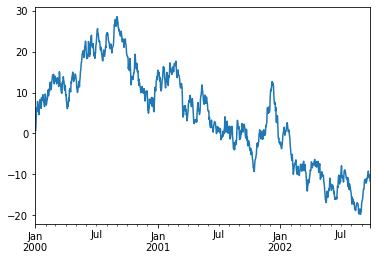

In [307]:
# render a chart
ts.plot();

In [304]:
# create a cummulative sum of the Series values
ts = ts.cumsum()
# create a chartts

2000-01-01     1.065040
2000-01-02     0.642149
2000-01-03     1.311646
2000-01-04     3.593903
2000-01-05     6.186868
                ...    
2002-09-22   -10.776547
2002-09-23   -10.263361
2002-09-24   -10.478385
2002-09-25   -10.159975
2002-09-26   -11.579989
Freq: D, Length: 1000, dtype: float64

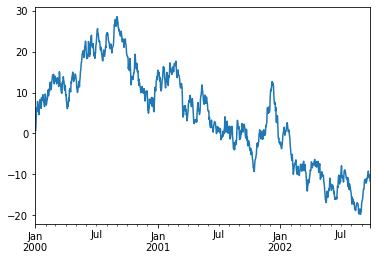

In [306]:
# render a chart
ts.plot()

On a `DataFrame`, the `plot()` method is a convenience to plot all of the columns with labels:

In [312]:
# create a DataFrame of random values with the DatetimeIndex as the row index and columns A-D
df = pd.DataFrame(
        np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
    )
df

,A,B,C,D
2000-01-01,-0.402931,-0.278476,-0.497106,-0.446404
2000-01-02,-0.627336,0.445252,0.086686,0.886552
2000-01-03,2.382583,0.641223,-1.257617,0.417210
2000-01-04,0.685714,-1.460779,-0.491459,0.279658
2000-01-05,-0.727997,0.519142,-0.157718,0.128248
...,...,...,...,...
2002-09-22,0.036149,-0.355306,-0.017366,2.044274
2002-09-23,1.354387,-1.661807,-0.578193,-0.577015
2002-09-24,0.457906,-1.065217,1.106457,-0.760472
2002-09-25,-0.840551,0.038778,-1.561695,-1.476113


In [313]:
# create a cummulative sum of the column values
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-0.402931,-0.278476,-0.497106,-0.446404
2000-01-02,-1.030267,0.166776,-0.410421,0.440148
2000-01-03,1.352316,0.807999,-1.668037,0.857359
2000-01-04,2.038029,-0.652780,-2.159497,1.137017
2000-01-05,1.310032,-0.133638,-2.317215,1.265265
...,...,...,...,...
2002-09-22,2.169587,-48.441599,-37.612219,33.666845
2002-09-23,3.523974,-50.103406,-38.190412,33.089829
2002-09-24,3.981880,-51.168623,-37.083955,32.329357
2002-09-25,3.141330,-51.129845,-38.645650,30.853244


<Figure size 432x288 with 0 Axes>

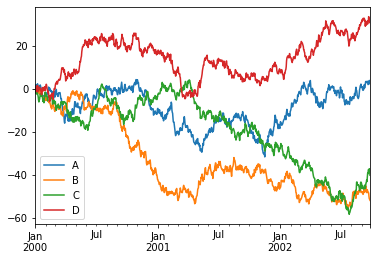

In [317]:
plt.figure();
df.plot();
plt.legend(loc='best');

## Getting data in/out

### CSV

Writing to a csv file.

In [318]:
df.to_csv("foo.csv")

Reading from a csv file.

In [319]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.402931,-0.278476,-0.497106,-0.446404
1,2000-01-02,-1.030267,0.166776,-0.410421,0.440148
2,2000-01-03,1.352316,0.807999,-1.668037,0.857359
3,2000-01-04,2.038029,-0.652780,-2.159497,1.137017
4,2000-01-05,1.310032,-0.133638,-2.317215,1.265265
...,...,...,...,...,...
995,2002-09-22,2.169587,-48.441599,-37.612219,33.666845
996,2002-09-23,3.523974,-50.103406,-38.190412,33.089829
997,2002-09-24,3.981880,-51.168623,-37.083955,32.329357
998,2002-09-25,3.141330,-51.129845,-38.645650,30.853244


### HDFS

Writing to a HDF5 Store.

In [320]:
df.to_hdf("foo.h5", "df")

Reading from a HDF5 Store.

In [321]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-0.402931,-0.278476,-0.497106,-0.446404
2000-01-02,-1.030267,0.166776,-0.410421,0.440148
2000-01-03,1.352316,0.807999,-1.668037,0.857359
2000-01-04,2.038029,-0.652780,-2.159497,1.137017
2000-01-05,1.310032,-0.133638,-2.317215,1.265265
...,...,...,...,...
2002-09-22,2.169587,-48.441599,-37.612219,33.666845
2002-09-23,3.523974,-50.103406,-38.190412,33.089829
2002-09-24,3.981880,-51.168623,-37.083955,32.329357
2002-09-25,3.141330,-51.129845,-38.645650,30.853244


### Excel

Writing to an excel file.

In [323]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file.

In [324]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.402931,-0.278476,-0.497106,-0.446404
1,2000-01-02,-1.030267,0.166776,-0.410421,0.440148
2,2000-01-03,1.352316,0.807999,-1.668037,0.857359
3,2000-01-04,2.038029,-0.652780,-2.159497,1.137017
4,2000-01-05,1.310032,-0.133638,-2.317215,1.265265
...,...,...,...,...,...
995,2002-09-22,2.169587,-48.441599,-37.612219,33.666845
996,2002-09-23,3.523974,-50.103406,-38.190412,33.089829
997,2002-09-24,3.981880,-51.168623,-37.083955,32.329357
998,2002-09-25,3.141330,-51.129845,-38.645650,30.853244


## Gotchas

If you are attempting to perform an operation you might see an exception like:

In [325]:
if pd.Series([False, True, False]):
  print("I was true")

ValueError: ignored

See [Comparisons](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas) as well.